In [67]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from collections import defaultdict
from math import log
import json
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 2.读取数据

In [68]:
# DATA_PATH = '../data/gxb.csv'
# DATA_PATH = '../data/test2.xlsx'
DATA_PATH = '../data/mushrooms.csv'

dataSet = pd.read_csv(DATA_PATH)
# dataSet = pd.read_excel(DATA_PATH)
dataSet

,class,cap-shape,cap-surface,cap-color,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [69]:
def createDataSet():
    dataSet = pd.read_csv(DATA_PATH)
    return dataSet

df_data = createDataSet()  # 创造示列数据
df_data = df_data[:]

In [70]:
# 蘑菇数据集把类别放到最后
cls = df_data.pop('class')
df_data.insert(loc=df_data.shape[1], column='class', value=cls, allow_duplicates=False)
df_data

,cap-shape,cap-surface,cap-color,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,f,c,n,k,e,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,f,c,b,k,e,c,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,f,c,b,n,e,c,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,f,c,n,n,e,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,f,w,b,k,t,e,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,a,c,b,y,e,?,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,a,c,b,y,e,?,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,a,c,b,n,e,?,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,f,c,n,b,t,?,...,w,w,p,w,o,e,w,v,l,p


In [71]:
# df_data = shuffle(df_data)
df_data = df_data.reset_index(drop=True)
df_data

,cap-shape,cap-surface,cap-color,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,f,c,n,k,e,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,f,c,b,k,e,c,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,f,c,b,n,e,c,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,f,c,n,n,e,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,f,w,b,k,t,e,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,a,c,b,y,e,?,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,a,c,b,y,e,?,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,a,c,b,n,e,?,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,f,c,n,b,t,?,...,w,w,p,w,o,e,w,v,l,p


# 2.划分训练集和验证集

In [72]:
slice = int(len(df_data) * 0.7)
slice

5686

In [73]:
train_data = df_data[:slice]
train_label = df_data['class']
test_data = df_data[slice:]
test_label = test_data.pop('class')
test_data

,cap-shape,cap-surface,cap-color,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5686,f,s,b,t,f,c,b,e,e,?,...,s,e,e,p,w,t,e,w,c,w
5687,k,f,c,f,f,w,n,w,e,b,...,s,w,n,p,w,o,e,w,v,l
5688,x,s,g,t,f,c,b,p,t,b,...,f,w,w,p,w,o,p,h,v,u
5689,f,y,g,f,f,c,b,h,e,b,...,k,p,n,p,w,o,l,h,v,p
5690,x,y,e,f,f,c,n,b,t,?,...,k,p,w,p,w,o,e,w,v,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,a,c,b,y,e,?,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,a,c,b,y,e,?,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,a,c,b,n,e,?,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,f,c,n,b,t,?,...,k,w,w,p,w,o,e,w,v,l


In [74]:
train_label

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

# 3.计算信息熵

In [75]:
# 计算数据集的熵，需D的最后一列决策属性为标签
def entropy(D):
    total_num = len(D)
    label_cnt = defaultdict(int)
    for i in range(total_num):
        label = D[i][-1]
        label_cnt[label] += 1
    ent = -sum([(cnt/total_num) * log(cnt/total_num, 2) for cnt in label_cnt.values()])
    return ent

# 4.计算条件熵

In [76]:
# # 计算列索引为index的属性对集合D的条件熵
def cond_entropy(D, index):
    total_num = len(D)
    feature_sets = defaultdict(list)
    for i in range(total_num):
        feature = D[i][index]
        feature_sets[feature].append(D[i])
    cond_ent = sum([(len(d)/total_num) * entropy(d) for d in feature_sets.values()])
    return cond_ent

# 7.ID3决策树模型

In [77]:
# 决策树节点类
class Node:
    def __init__(self, is_leaf, label=None, feature_idx=None, feature_name=None):
        self.is_leaf = is_leaf
        self.label = label  # 仅针对于叶子节点
        self.feature_idx = feature_idx  # 该节点特征对应的列索引，仅针对于非叶子节点
        self.feature_name = feature_name  # 该节点特征名，仅针对于非叶子节点
        self.sons = {}
        
    def add_son(self, feature_value, node):
        self.sons[feature_value] = node
        
    def predict(self, x):
        if self.is_leaf:
            return self.label
        features = []
        for feature in self.sons:
            features.append(feature)
            
        if x[self.feature_idx] not in features:
            return '未知'
        nextson = self.sons[x[self.feature_idx]]

        nextnode = x.copy()
        del nextnode[self.feature_idx]
        return nextson.predict(nextnode)
    
    def __repr__(self):
        s = {
            "feature": self.feature_name,
            "label": self.label,
            "sons": self.sons
        }
        return '{}'.format(s)

In [78]:
class ID3Tree:
    def __init__(self, epsilon=0.1):
        """
        epsilon: 决策树停止生长的信息增益阈值
        """
        self.epsilon = epsilon
        self.decision_tree = None
        self.depth = 0
        self.deptharray = []
        self.depthlen = 0
        
    def fit(self, data):
        """data为dataframe格式"""
        # self.decision_tree生成的树
        self.decision_tree = self._train(data)
        return self.decision_tree
        
    def predict(self, x):
        if self.decision_tree:
            result = []
            for i in x:
                re = self.decision_tree.predict(list(i))
                result.append(re)
            return result
        
    def _get_max_gain_feature(self, testD,D):
        '''
            信息增益
        '''
        # testD = pd.DataFrame(D)
        y, feature_names = testD.iloc[:, -1], testD.columns[:-1]

        num_features = len(D[0]) - 1
        ent_D = entropy(D)
        
        index, max_gainRatio = 0, 0
        for i in range(num_features):
            # cond_ent = cond_entropy(D, i)
            cond_ent = cond_entropy(D, i)
            gain = ent_D - cond_ent  # 信息增益 = H(D) - H(D|A)
            # print("feature_names",feature_names[i])
            # print("gain",gain)
            if gain:
                gainRatio = gain
                if gainRatio > max_gainRatio:
                    max_gainRatio = gainRatio
                    index = i
        return index, max_gainRatio
            
    def _train(self, data):
        """递归构建决策树，data为dataframe格式"""
        y, feature_names = data.iloc[:, -1], data.columns[:-1]
        # 1.数据集中所有样本均属于同一类别，则停止生长
        if len(y.value_counts()) == 1:
            return Node(is_leaf=True, label=y.iloc[0])
        
        # 2.数据集中特征数量为空，则将包含实例数量最多的类作为该叶子节点的标签
        if len(feature_names) == 0:
            label = y.value_counts().sort_values(ascending=False).index[0]
            return Node(is_leaf=True, label=label)
        
        
        # 计算信息增益最大的特征
        idx, max_gain = self._get_max_gain_feature(data,np.array(data))

        # idx = self._abc(data)
        
        # # 3. 如果最大的信息增益小于设置的阈值，则停止生长
        # if max_gain < self.epsilon:
        #     label = y.value_counts().sort_values(ascending=False).index[0]
        #     return Node(is_leaf=True, label=label)

        # # 3. 如果最大的深度，则停止生长
        if self.depthlen > 3:
            label = y.value_counts().sort_values(ascending=False).index[0]
            return Node(is_leaf=True, label=label)
        
        target_feature = feature_names[idx]  # 当前节点特征
        # print(np.array(target_feature))

        # 创建节点
        curr_node = Node(is_leaf=False, feature_idx=idx, feature_name=target_feature)
        value_sets = data[target_feature].value_counts().index  # 该特征取值集合

        for value in value_sets:
            sub_data = data.loc[data[target_feature]==value].drop([target_feature], axis=1)
            sub_data = sub_data.reset_index(drop=True)
            # print(np.array(sub_data))
            # 4.递归生成子树
            self.depth += 1 
            sub_tree = self._train(sub_data)
            curr_node.add_son(value, sub_tree)
        
        # print("self.depth",self.depth)
        self.deptharray.append(self.depth)
        self.deptharray = list(set(self.deptharray))
        self.depthlen = len(self.deptharray) + 1

        return curr_node

In [79]:
dt = ID3Tree()
treeModel = dt.fit(train_data)
test_pred = dt.predict(test_data.values)
accuracy_score(test_label, test_pred)

0.25471698113207547

In [80]:
from sklearn.metrics import classification_report
print(classification_report(test_pred,test_label))

              precision    recall  f1-score   support

           e       0.74      0.21      0.33      2105
           p       0.09      0.91      0.17       189
          未知       0.00      0.00      0.00       144

    accuracy                           0.25      2438
   macro avg       0.28      0.37      0.17      2438
weighted avg       0.64      0.25      0.30      2438



d:\Users\96212\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Users\96212\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Users\96212\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix_model = confusion_matrix(test_pred, test_label)

In [82]:
import itertools

def cnf_matrix_plotter(cm,classes):
    '''
    传入混淆矩阵和标签名称列表，绘制混淆矩阵
    '''
    # plt.imshow (cm, interpolation='nearest', cmap=plt.cm.Greens)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm. shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
        horizontalalignment="center",
        color="white" if cm[i,j] > threshold else "black",fontsize=25)
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel(' Predicted Label')
    plt.show()

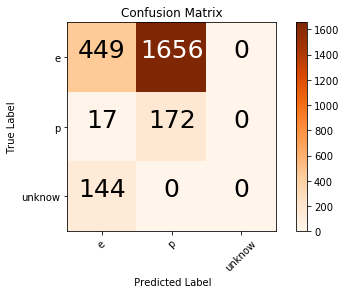

In [83]:
cnf_matrix_plotter(confusion_matrix_model,['e','p','unknow'])

# 8.k折交叉验证

In [84]:
from sklearn. metrics import roc_curve,auc
def ID3Tree_kfold(train_data,train_label,random_state,n_splits):
    score_result=[]
    true_result=[]
    pred_result=[]
    kfold = KFold(n_splits=n_splits, shuffle=True,random_state=random_state)
    # model = []
    for train_idx, val_idx in kfold.split(train_data):
        train_x = train_data.loc[train_idx].reset_index(drop=True)
        train_y = train_label.loc[train_idx].reset_index(drop=True)
        # print(val_idx)
        val_x = train_data.loc[val_idx].reset_index(drop=True)
        val_y = val_x.pop('class')
        treeModel = ID3Tree()
        treeModel.fit(train_x)
        # print(val_x)
        test_pred = treeModel.predict(val_x.values)
        # model.append(treeModel)
        true_result.append(val_y)
        pred_result.append(test_pred)
        score_result.append(accuracy_score(val_y, test_pred))
        random_state+=1
        
        # y_pred_quant = treeModel.predict(X_test)[:,1]
        # fpr,tpr,thresholds = roc_curve(val_y,test_pred)
        # auc = auc(fpr,tpr)
        # print("auc",auc)    
    return true_result,pred_result,score_result

In [85]:
n_splits=5
random_state = 100
train_data = df_data[:]
true_result,pred_result,score_result = ID3Tree_kfold(train_data,train_label,random_state,n_splits)

In [86]:
#test_data就是5折交叉验证中5次预测的结果
pre_y=pd.DataFrame(score_result).T
# #将5次预测的结果求取平均值，当然也可以使用其他的方法
pre_y['averge']=pre_y[[i for i in range(n_splits)]].mean(axis=1)
pre_y

,0,1,2,3,4,averge
0,0.940308,0.943385,0.945231,0.932308,0.933498,0.938946


In [87]:
from sklearn.metrics import classification_report
idx = 1
print(classification_report(true_result[idx],pred_result[idx]))

              precision    recall  f1-score   support

           e       0.91      0.99      0.95       867
           p       0.99      0.89      0.94       758

    accuracy                           0.94      1625
   macro avg       0.95      0.94      0.94      1625
weighted avg       0.95      0.94      0.94      1625



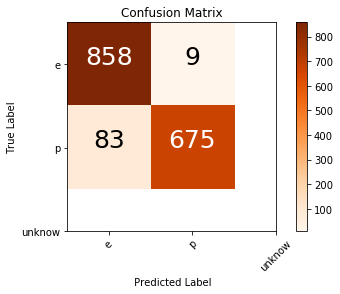

In [88]:
from sklearn.metrics import confusion_matrix

idx = 1
confusion_matrix_model = confusion_matrix(true_result[idx],pred_result[idx])

cnf_matrix_plotter(confusion_matrix_model,['e','p','unknow'])